# Sprint 6 - Predicting future environmental intensity (Time Series)

In this notebook, we will predict future environmental intensity for all the companies in the 'Excel data'. We will be using data from previous years to predict the future environmental intesity. 

First, we will create the following columns:

1) Industry Indicator
- 1 if above the industry average in current year
- 0 if at industry average in current yeat
- (-1) if below the industry average in current year
2) Environmental Intensity Growth : ((Environmental Intensity in Current Year / Environmental Intensity Last Year) - 1) * 100

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('Environmental_Impact_dataset.csv')
column_list = []
for column in df.columns:
    column_list.append(column.replace(' ', ''))
df.columns = column_list
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')
df.head(3)

The dataset has 14515 rows and 11 columns


,Year,CompanyName,Country,Industry(Exiobase),EnvironmentalIntensity(Sales),Env_intensity,industry_avg,Industry_indicator,industry_avg_year,Industry_indicator_year,Environmental_Growth
0,2016,1&1 DRILLISCH AG,Germany,Post and telecommunications (64),-0.07%,-0.0007,-0.018382,1,-0.011640,1,NaN
1,2010,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.12%,-0.0012,-0.020072,1,-0.006402,1,NaN
2,2011,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.16%,-0.0016,-0.020072,1,-0.009838,1,33.333333


In [19]:
df = df.iloc[:,0:6]
df.head()

,Year,CompanyName,Country,Industry(Exiobase),EnvironmentalIntensity(Sales),Env_intensity
0,2016,1&1 DRILLISCH AG,Germany,Post and telecommunications (64),-0.07%,-0.0007
1,2010,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.12%,-0.0012
2,2011,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.16%,-0.0016
3,2012,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.15%,-0.0015
4,2010,3M COMPANY,United States,Activities of membership organisation n.e.c. ...,-7.90%,-0.0790


In [20]:
def percent_to_float(s):
    return float(s.strip('%')) / 100.0

replace_dict = {'(':'',')':'', ' ' : '', ',' : ''}
def paranthesis_to_minus(value):
    for i, j in replace_dict.items():
        value = value.replace(i, j)
    value = int(f'-{value}')
    return value

df['Env_intensity'] = df['EnvironmentalIntensity(Sales)'].apply(percent_to_float)

In [21]:
df.head()

,Year,CompanyName,Country,Industry(Exiobase),EnvironmentalIntensity(Sales),Env_intensity
0,2016,1&1 DRILLISCH AG,Germany,Post and telecommunications (64),-0.07%,-0.0007
1,2010,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.12%,-0.0012
2,2011,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.16%,-0.0016
3,2012,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.15%,-0.0015
4,2010,3M COMPANY,United States,Activities of membership organisation n.e.c. ...,-7.90%,-0.0790


### Creating industry indicator

In [22]:
industry_avg = df.groupby('Industry(Exiobase)')[['Env_intensity']].mean().reset_index()
df['industry_avg'] = df['Env_intensity'].groupby(df['Industry(Exiobase)']).transform('mean')

In [23]:
def create_ind(df):
    if(df['Env_intensity'] > df['industry_avg']):
        return 1
    elif (df['Env_intensity'] == df['industry_avg']):
        return 0
    elif (df['Env_intensity'] < df['industry_avg']):
        return -1

df['Industry_indicator'] = df.apply(create_ind, axis = 1)
df.head()

,Year,CompanyName,Country,Industry(Exiobase),EnvironmentalIntensity(Sales),Env_intensity,industry_avg,Industry_indicator
0,2016,1&1 DRILLISCH AG,Germany,Post and telecommunications (64),-0.07%,-0.0007,-0.018382,1
1,2010,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.12%,-0.0012,-0.020072,1
2,2011,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.16%,-0.0016,-0.020072,1
3,2012,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.15%,-0.0015,-0.020072,1
4,2010,3M COMPANY,United States,Activities of membership organisation n.e.c. ...,-7.90%,-0.0790,-0.117561,1


In [24]:
def create_ind_year(df):
    if(df['Env_intensity'] > df['industry_avg_year']):
        return 1
    elif (df['Env_intensity'] == df['industry_avg_year']):
        return 0
    elif (df['Env_intensity'] < df['industry_avg_year']):
        return -1

df['industry_avg_year'] = df.groupby(['Industry(Exiobase)','Year']).transform('mean')[['Env_intensity']]

df['Industry_indicator_year'] = df.apply(create_ind_year, axis = 1)
df.head()

#df['industry_avg_year']=df.groupby(['Industry(Exiobase)','Year'])['Env_intensity'].mean().reset_index()


,Year,CompanyName,Country,Industry(Exiobase),EnvironmentalIntensity(Sales),Env_intensity,industry_avg,Industry_indicator,industry_avg_year,Industry_indicator_year
0,2016,1&1 DRILLISCH AG,Germany,Post and telecommunications (64),-0.07%,-0.0007,-0.018382,1,-0.011640,1
1,2010,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.12%,-0.0012,-0.020072,1,-0.006402,1
2,2011,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.16%,-0.0016,-0.020072,1,-0.009838,1
3,2012,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.15%,-0.0015,-0.020072,1,-0.024437,1
4,2010,3M COMPANY,United States,Activities of membership organisation n.e.c. ...,-7.90%,-0.0790,-0.117561,1,-0.084583,1


In [25]:
df.loc[(df['Industry(Exiobase)'] == 'Activities auxiliary to financial intermediation (67)'),:].sort_values(by='Year')

,Year,CompanyName,Country,Industry(Exiobase),EnvironmentalIntensity(Sales),Env_intensity,industry_avg,Industry_indicator,industry_avg_year,Industry_indicator_year
8166,2016,ADECCO GROUP AG,Switzerland,Activities auxiliary to financial intermediati...,-0.10%,-0.0010,-0.004417,1,-0.007880,1
14368,2016,WOLTERS KLUWER NV,Netherlands,Activities auxiliary to financial intermediati...,-0.20%,-0.0020,-0.004417,1,-0.007880,1
14123,2016,VERISK ANALYTICS INCORPORATION,United States,Activities auxiliary to financial intermediati...,-0.21%,-0.0021,-0.004417,1,-0.007880,1
13738,2016,TELEPERFORMANCE SE,France,Activities auxiliary to financial intermediati...,-1.10%,-0.0110,-0.004417,-1,-0.007880,-1
12891,2016,SAGA PLC,United Kingdom,Activities auxiliary to financial intermediati...,-2.82%,-0.0282,-0.004417,-1,-0.007880,-1
...,...,...,...,...,...,...,...,...,...,...
9736,2019,DKSH HOLDING AG,Switzerland,Activities auxiliary to financial intermediati...,-0.17%,-0.0017,-0.004417,1,0.002943,-1
10721,2019,HONG KONG EXCHANGES AND CLEARING LIMITED,Hong Kong,Activities auxiliary to financial intermediati...,-0.34%,-0.0034,-0.004417,1,0.002943,-1
10077,2019,EXPERIAN PLC,United Kingdom,Activities auxiliary to financial intermediati...,-0.20%,-0.0020,-0.004417,1,0.002943,-1
11536,2019,LONDON STOCK EXCHANGE GROUP PLC,United Kingdom,Activities auxiliary to financial intermediati...,-0.19%,-0.0019,-0.004417,1,0.002943,-1


### Creating Environmental growth

Environmental Intensity Growth : ((Environmental Intensity in Current Year / Environmental Intensity Last Year) - 1) * 100

In [26]:
df = df.sort_values(by=['CompanyName','Year'], ascending = True)
df.head()

,Year,CompanyName,Country,Industry(Exiobase),EnvironmentalIntensity(Sales),Env_intensity,industry_avg,Industry_indicator,industry_avg_year,Industry_indicator_year
0,2016,1&1 DRILLISCH AG,Germany,Post and telecommunications (64),-0.07%,-0.0007,-0.018382,1,-0.011640,1
1,2010,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.12%,-0.0012,-0.020072,1,-0.006402,1
2,2011,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.16%,-0.0016,-0.020072,1,-0.009838,1
3,2012,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.15%,-0.0015,-0.020072,1,-0.024437,1
4,2010,3M COMPANY,United States,Activities of membership organisation n.e.c. ...,-7.90%,-0.0790,-0.117561,1,-0.084583,1


In [27]:
df['Environmental_Growth'] = df.groupby(['CompanyName'])['Env_intensity'].apply(lambda x: x.pct_change()).to_numpy() * 100
df.head()

,Year,CompanyName,Country,Industry(Exiobase),EnvironmentalIntensity(Sales),Env_intensity,industry_avg,Industry_indicator,industry_avg_year,Industry_indicator_year,Environmental_Growth
0,2016,1&1 DRILLISCH AG,Germany,Post and telecommunications (64),-0.07%,-0.0007,-0.018382,1,-0.011640,1,NaN
1,2010,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.12%,-0.0012,-0.020072,1,-0.006402,1,NaN
2,2011,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.16%,-0.0016,-0.020072,1,-0.009838,1,33.333333
3,2012,3I GROUP PLC,United Kingdom,"Financial intermediation, except insurance an...",-0.15%,-0.0015,-0.020072,1,-0.024437,1,-6.250000
4,2010,3M COMPANY,United States,Activities of membership organisation n.e.c. ...,-7.90%,-0.0790,-0.117561,1,-0.084583,1,NaN


### Model 1 - Past years Environmental Intensity

In [53]:
df1 = pd.read_csv('Sprint #6/Environmental_Impact_dataset.csv')


In [54]:
def p2f(x):
    return float(x.strip('%'))/100
df1['EnvironmentalIntensity(Sales)'] = df1['EnvironmentalIntensity(Sales)'].apply(p2f)

In [55]:
companies_2018 = list(df1[df1['Year'] == 2018]['CompanyName'])
companies_2019 = list(df1[(df1['Year'] == 2019) & (df1['CompanyName'].isin(companies_2018))]['CompanyName'])

#Getting companies that are in both years
list2018_as_set = set(companies_2018)
intersection = list2018_as_set.intersection(companies_2019)

X = df1[(df1['Year'] == 2018) & (df1['CompanyName'].isin(intersection))][['EnvironmentalIntensity(Sales)']]
y = df1[(df1['Year'] == 2019) & (df1['CompanyName'].isin(intersection))][['EnvironmentalIntensity(Sales)']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('R2 score:', metrics.r2_score(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))


R2 score: 0.8825319170790614
MSE:  0.010786739663931547


### Model 2 - Past years average environmental intensity

# Using average environmental intensity of year 2016-2018 to predict 2019

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score

In [36]:
df=pd.read_csv('Datasets/EE-ISIN_merged.csv')
df.head()

,Unnamed: 0,ISIN,Year,CompanyName,Country,Industry(Exiobase),EnvironmentalIntensity(Sales),EnvironmentalIntensity(OpInc),TotalEnvironmentalCost,WorkingCapacity,...,SDG15.5,%Imputed,gvkey,fyear,datadate,at,isin,conm,fic,sic
0,0,MYL1818OO003,2019,BURSA MALAYSIA BHD,Malaysia,Activities auxiliary to financial intermediati...,-1.68%,-3.47%,"(1,968,379)","(1,924,910)",...,(79),4%,272691,2019,20191231,2321.040,MYL1818OO003,BURSA MALAYSIA BHD,MYS,6200.0
1,1,GB0031638363,2019,INTERTEK GROUP PLC,United Kingdom,Activities auxiliary to financial intermediati...,-1.53%,-9.49%,"(60,599,272)","(59,281,663)",...,"(2,470)",1%,252384,2019,20191231,2818.400,GB0031638363,INTERTEK GROUP PLC,GBR,8700.0
2,2,ZAE000079711,2019,JSE LIMITED,South Africa,Activities auxiliary to financial intermediati...,-1.46%,NaN,"(2,290,124)","(2,239,814)",...,(93),2%,278391,2019,20191231,40227.215,ZAE000079711,JSE LIMITED,ZAF,6211.0
3,3,FR0006174348,2019,BUREAU VERITAS SA,France,Activities auxiliary to financial intermediati...,-0.70%,-5.10%,"(39,978,650)","(39,107,612)",...,"(1,633)",3%,286961,2019,20191231,7049.100,FR0006174348,BUREAU VERITAS SA,FRA,8700.0
4,4,GB0007370074,2019,RICARDO PLC,United Kingdom,Activities auxiliary to financial intermediati...,-0.67%,-7.27%,"(3,247,235)","(3,176,408)",...,(133),3%,221859,2019,20190630,371.900,GB0007370074,RICARDO PLC,GBR,8711.0


In [38]:
def p2f(x):
    return float(x.strip('%'))/100
df['EnvironmentalIntensity(Sales)'] = df['EnvironmentalIntensity(Sales)'].apply(p2f)

Get the average of Environmental Intensity of 2018

---



In [39]:
EI_2018 = df[df['Year'] == 2018]
df1=list(EI_2018['EnvironmentalIntensity(Sales)'])
def Average(lst):
    return sum(lst) / len(lst)
df['average2018']=Average(df1)
print(df['average2018'])

0       -0.103059
1       -0.103059
2       -0.103059
3       -0.103059
4       -0.103059
           ...   
10991   -0.103059
10992   -0.103059
10993   -0.103059
10994   -0.103059
10995   -0.103059
Name: average2018, Length: 10996, dtype: float64


Get the average of Enviornmental Intensity of 2017 and 2016

In [40]:
EI_2017 = df[df['Year'] == 2017]
df2=list(EI_2017['EnvironmentalIntensity(Sales)'])
EI_2016 = df[df['Year'] == 2016] 
df3=list(EI_2016['EnvironmentalIntensity(Sales)'])

In [41]:
df['average2017']=Average(df2)
print(df['average2017'])
df['average2016']=Average(df3)
print(df['average2016'])

0       -0.104129
1       -0.104129
2       -0.104129
3       -0.104129
4       -0.104129
           ...   
10991   -0.104129
10992   -0.104129
10993   -0.104129
10994   -0.104129
10995   -0.104129
Name: average2017, Length: 10996, dtype: float64
0       -0.10526
1       -0.10526
2       -0.10526
3       -0.10526
4       -0.10526
          ...   
10991   -0.10526
10992   -0.10526
10993   -0.10526
10994   -0.10526
10995   -0.10526
Name: average2016, Length: 10996, dtype: float64


In [42]:
df[['average2018','average2017','average2016']]

,average2018,average2017,average2016
0,-0.103059,-0.104129,-0.10526
1,-0.103059,-0.104129,-0.10526
2,-0.103059,-0.104129,-0.10526
3,-0.103059,-0.104129,-0.10526
4,-0.103059,-0.104129,-0.10526
...,...,...,...
10991,-0.103059,-0.104129,-0.10526
10992,-0.103059,-0.104129,-0.10526
10993,-0.103059,-0.104129,-0.10526
10994,-0.103059,-0.104129,-0.10526


In [43]:
EI_2019 = df[df['Year'] == 2019]
EI_2019.head()
EI_2019['EnvironmentalIntensity(Sales)']

0      -0.0168
1      -0.0153
2      -0.0146
3      -0.0070
4      -0.0067
         ...  
1057   -0.0135
1058   -0.0033
1059   -0.0008
1060   -0.0006
1061   -0.0004
Name: EnvironmentalIntensity(Sales), Length: 1062, dtype: float64

In [44]:
EI_2019['average2016']=Average(df3)
EI_2019['average2017']=Average(df2)
EI_2019['average2018']=Average(df1)

In [45]:
y = EI_2019['EnvironmentalIntensity(Sales)']
X= EI_2019[['average2018','average2017','average2016']]
x_train, x_test, y_train, y_test = train_test_split(X ,y, test_size = 0.2, random_state = 42)

In [46]:
# train Linear Regression
LRtrainer = LinearRegression()
LRtrainer.fit(x_train,y_train)

LinearRegression()

In [47]:
# mse for linear regression
y_pred_lr = LRtrainer.predict(x_test)
print(mean_squared_error(y_pred_lr, y_test))

0.11142058821571742


In [48]:
# display the parameters
print('Model intercept: ', LRtrainer.intercept_)
print('Model coefficients: ', LRtrainer.coef_)

Model intercept:  -0.09598583321284727
Model coefficients:  [ 0.          0.46993413 -0.15664471]


In [49]:
print('R2 score:', r2_score(y_test, y_pred_lr))

R2 score: -2.098252643123466e-05


### Model 3 - Yearly Industry Average

For this model, the predictor will be the industry average for the respective year. 
There is no data for 2020, so we plan to predict 2019 environmental intensity.  Accordingly, we used 2018 and 2017 Industry data (past data) to predict 2019 evronmental intensity. 

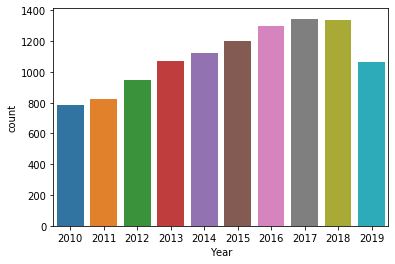

In [50]:
sns.countplot(x='Year', data = df)

The dataset does not contain consistent records throught out the years. Therefore, it could be possible we have data for one company in 2019 but not data from that company in 2018, 2017, etc. 

We will start by only using 2018 industry average as a feature to predict 2019 environmental intensity. First, we will subset the companies that we have 2018 data and get their 2019 environmental intensity.

In [57]:
df_mod3.columns

Index(['Unnamed: 0_x', 'ISIN_x', 'Year_x', 'CompanyName', 'Country_x',
       'Industry(Exiobase)_x', 'EnvironmentalIntensity(Sales)_x',
       'EnvironmentalIntensity(OpInc)_x', 'TotalEnvironmentalCost_x',
       'WorkingCapacity_x', 'FishProductionCapacity_x',
       'CropProductionCapacity_x', 'MeatProductionCapacity_x',
       'Biodiversity_x', 'AbioticResources_x',
       'Waterproductioncapacity(Drinkingwater&IrrigationWater)_x',
       'WoodProductionCapacity_x', 'SDG1.5_x', 'SDG2.1_x', 'SDG2.2_x',
       'SDG2.3_x', 'SDG2.4_x', 'SDG3.3_x', 'SDG3.4_x', 'SDG3.9_x', 'SDG6_x',
       'SDG12.2_x', 'SDG14.1_x', 'SDG14.2_x', 'SDG14.3_x', 'SDG14.c_x',
       'SDG15.1_x', 'SDG15.2_x', 'SDG15.5_x', '%Imputed_x', 'gvkey_x',
       'fyear_x', 'datadate_x', 'at_x', 'isin_x', 'conm_x', 'fic_x', 'sic_x',
       'average2018_x', 'average2017_x', 'average2016_x', 'Unnamed: 0_y',
       'ISIN_y', 'Year_y', 'Country_y', 'Industry(Exiobase)_y',
       'EnvironmentalIntensity(Sales)_y', 'Environmen

In [56]:
df_2018 = df.loc[df.Year == 2018, ]
df_2019 = df.loc[df.Year == 2019, ]
df_mod3 = pd.merge(df_2018, df_2019, on='CompanyName',how='inner')
df_mod3 = df_mod3[['Year_x','CompanyName','industry_avg_year_x','Year_y','Env_intensity_y']]
df_mod3.head()

KeyError: "['industry_avg_year_x', 'Env_intensity_y'] not in index"

In [ ]:
X = df_mod3[['industry_avg_year_x']]
y = df_mod3.iloc[:,4]
print(X.shape)
print(y.shape)

## Now run the regression and interpret the results

We will do the same thing but now including 2016-2018 to predict 2019

In [ ]:
df_2016 = df.loc[df.Year == 2016, ]
df_2017 = df.loc[df.Year == 2017, ]
df1 = df_2016.merge(df_2017, how='inner', on='CompanyName', suffixes=('_2016', '_2017'))
df1 = df1.merge(df_2018, how='inner', on='CompanyName')
df1 = df1.merge(df_2019, how='inner', on='CompanyName', suffixes=('_2018', '_2019'))
df1 = df1[['Year_2016','industry_avg_year_2016','Year_2017','industry_avg_year_2017','Year_2018','industry_avg_year_2018','Year_2019','Env_intensity_2019']]

In [ ]:
# filter_col = [col for col in df1 if col.startswith('industry_avg_year')]
# filter_col
df1.head()

In [ ]:
X = df1[['industry_avg_year_2016','industry_avg_year_2017','industry_avg_year_2018']]
y = df1.iloc[:,7]
print(X.shape)
print(y.shape)

## Now run the regression and interpret the results

In [ ]:
df_2020=df[df['Year'] == 2020]
print(df_2020)
.
df_2018=df[df['Year'] == 2018]
df_2017=df[df['Year'] == 2017]

print(df_2018.info())
print(df_2017.info())

In [ ]:
#Build up model dataframe with EnvironmentalIntensity2019, Ind_Yearavg2018, Ind_Yearavg2017
df_2019=df[df['Year'] == 2019]
df2019=df_2019[['Year','CompanyName','Env_intensity']] 
df2019.rename(columns={'Env_intensity': 'Env_intensity2019'}, inplace=True) 
df2018=df_2018[['CompanyName','industry_avg_year']]
df2018.rename(columns={'industry_avg_year': 'Ind_Yearavg2018'}, inplace=True) 
df2017=df_2017[['CompanyName','industry_avg_year']]
df2017.rename(columns={'industry_avg_year': 'Ind_Yearavg2017'}, inplace=True) 
mdl = pd.merge(df2019, df2018, on=["CompanyName"])
mdl1= pd.merge(mdl, df2017, on=["CompanyName"])
mdl1

In [ ]:
X=mdl1[['Ind_Yearavg2018','Ind_Yearavg2017']]
y=mdl1['Env_intensity2019']

In [ ]:
regr = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
regr.fit(X_train, y_train)
y_train_pred = np.exp(regr.predict(X_train))
y_pred = np.exp(regr.predict(X_test))
y_test = np.exp(y_test)

In [ ]:
print('MSE train: %.3f, test: %.3f' % (metrics.mean_squared_error(y_train, y_train_pred),
                metrics.mean_squared_error(y_test, y_pred)))

### Model 4 -Yearly Industry Indicator

In [ ]:
X=df[['Industry_indicator_year']]
y=df['Env_intensity']

In [ ]:
regr = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
regr.fit(X_train, y_train)
y_train_pred = np.exp(regr.predict(X_train))
y_pred = np.exp(regr.predict(X_test))
y_test = np.exp(y_test)

In [ ]:
print('MSE train: %.3f, test: %.3f' % (metrics.mean_squared_error(y_train, y_train_pred),
                metrics.mean_squared_error(y_test, y_pred)))

### Model 5 -Growth Rate

In [ ]:
X=df[['Environmental_Growth']]
y=df['Env_intensity']

In [ ]:
model_df = df[['Env_intensity','Environmental_Growth']].copy()
model_df.dropna(inplace = True)

x = model_df[['Env_intensity','Environmental_Growth']]
y = model_df['Env_intensity']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
reg = LinearRegression().fit(X_train, y_train)

y_train_pred = np.exp(reg.predict(X_train))
y_pred = np.exp(reg.predict(X_test))
y_test = np.exp(y_test)

In [ ]:
print('MSE train: %.3f, test: %.3f' % (metrics.mean_squared_error(y_train, y_train_pred),
                metrics.mean_squared_error(y_test, y_pred)))